# Muhamad Rizky Nilzamyahya 2009106029

In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import KMeans
import scipy
import numpy as np
import pandas as pd
import matplotlib

In [12]:
print(f'versi matplotlib {matplotlib.__version__}', # 3.5.1
      f'versi scipy {scipy.__version__}', # 1.8.0
      f'versi numpy {np.__version__}', # 1.22.2
      f'versi pd {pd.__version__}', # 1.4.1
      sep='\n')

versi matplotlib 3.6.0
versi scipy 1.9.1
versi numpy 1.23.3
versi pd 1.5.0


In [13]:
df = pd.read_csv("clean_anime.csv")
df.head()

,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members,type_encoded,0,1,2,3,4,5
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
points = df.iloc[:,[1,5]].values
points

array([[32281, '1'],
       [5114, '64'],
       [28977, '51'],
       ...,
       [5621, '4'],
       [6133, '1'],
       [26081, '1']], dtype=object)

In [80]:
model = KMeans(n_clusters=3)

In [81]:
points = df[["rating","type_encoded"]]
model.fit(points)
labels = model.labels_
print(labels)

[0 1 1 ... 2 2 0]


In [82]:
dfKmeans = pd.DataFrame({'labels': labels, 'rating': df.rating})

In [83]:
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["rating"])

In [84]:
print(ct)

rating  1.67   1.92   2.00   2.14   2.37   2.49   2.55   2.58   2.67   2.69   \
labels                                                                         
0           0      1      0      0      0      1      0      0      1      1   
1           0      0      0      0      0      0      0      0      0      0   
2           1      0      1      1      1      0      1      1      2      0   

rating  ...  9.15   9.16   9.17   9.25   9.26   9.33   9.37   9.50   9.60   \
labels  ...                                                                  
0       ...      0      0      0      0      0      1      1      1      0   
1       ...      1      1      1      2      1      0      0      0      1   
2       ...      0      0      0      0      0      0      0      0      0   

rating  10.00  
labels         
0           1  
1           0  
2           0  

[3 rows x 599 columns]


In [85]:
xs = points.iloc[:,0]
ys = points.iloc[:,1]

In [86]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

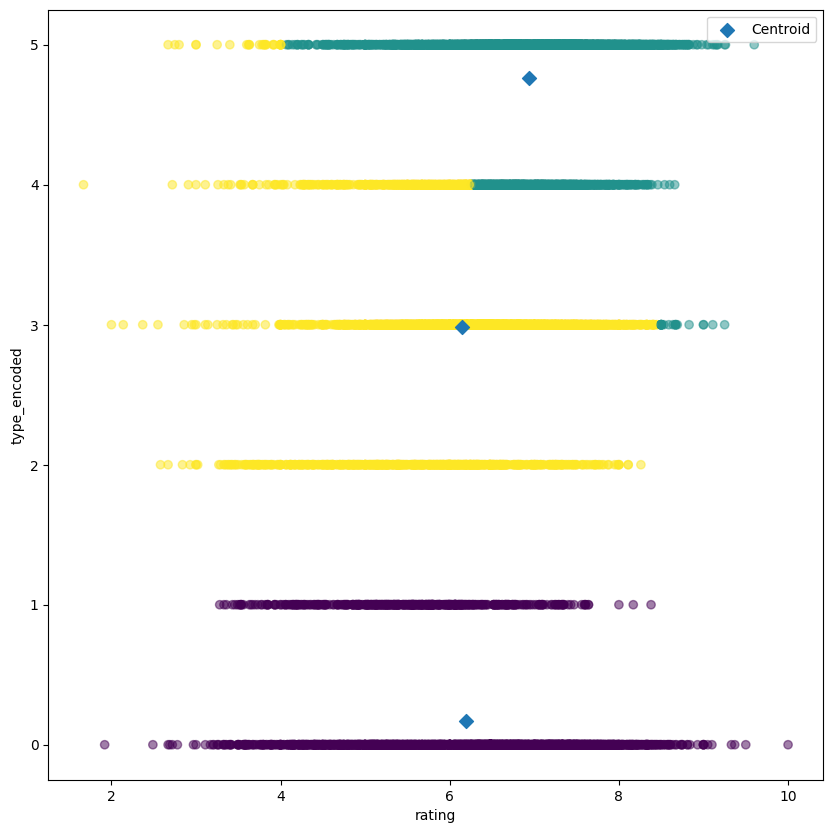

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("rating")
plt.ylabel("type_encoded")
plt.legend()
plt.show()

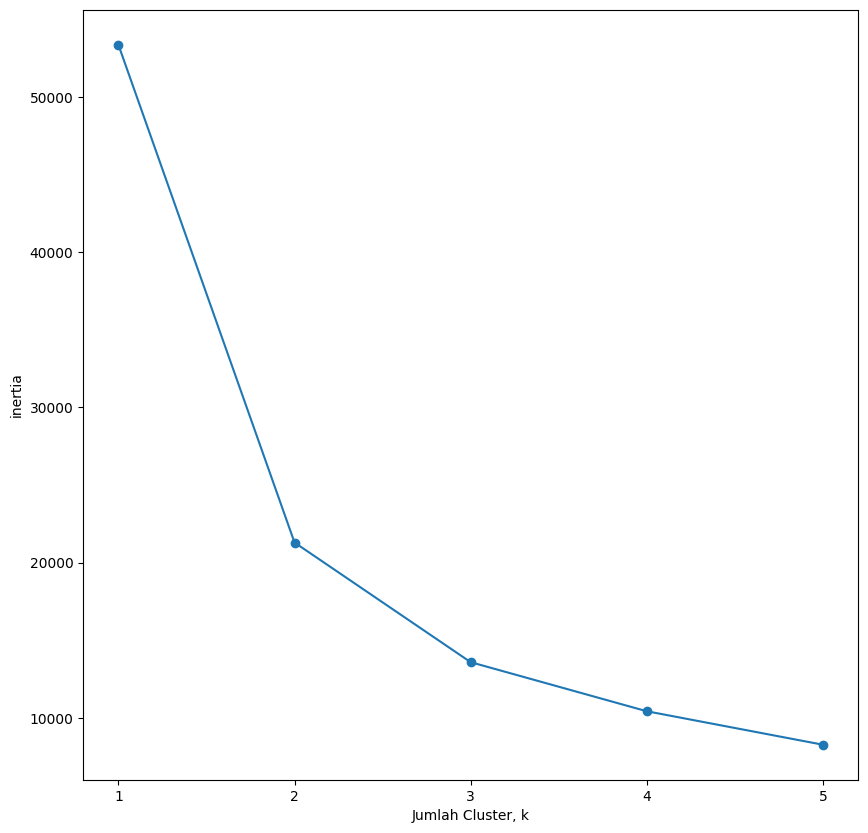

In [88]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()